In [1]:
import pandas as pd 
import numpy as np 
import os
os.chdir('C:\\Users\\fang.bao\\Downloads')

In [2]:
df=pd.read_excel('PYTHON-RFM.xlsx')
df.head()

,品牌名称,买家昵称,付款日期,订单状态,实付金额,邮费,省份,城市,购买数量
0,数据不吹牛,叫我李2,2019-01-01 00:17:59,交易成功,186,6,上海,上海市,1
1,数据不吹牛,0cyb1992,2019-01-01 00:59:54,交易成功,145,0,广东省,广州市,1
2,数据不吹牛,萝污萌莉,2019-01-01 07:48:48,交易成功,194,8,山东省,东营市,1
3,数据不吹牛,atblovemyy,2019-01-01 09:15:49,付款以后用户退款成功，交易自动关闭,84,0,江苏省,镇江市,1
4,数据不吹牛,小星期鱼,2019-01-01 09:59:33,付款以后用户退款成功，交易自动关闭,74,0,上海,上海市,1


In [3]:
df['订单状态'].unique()

array(['交易成功', '付款以后用户退款成功，交易自动关闭'], dtype=object)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28833 entries, 0 to 28832
Data columns (total 9 columns):
品牌名称    28833 non-null object
买家昵称    28833 non-null object
付款日期    28833 non-null datetime64[ns]
订单状态    28833 non-null object
实付金额    28833 non-null int64
邮费      28833 non-null int64
省份      28833 non-null object
城市      28832 non-null object
购买数量    28833 non-null int64
dtypes: datetime64[ns](1), int64(3), object(5)
memory usage: 2.0+ MB


In [5]:
df=df.loc[df['订单状态']=='交易成功',:]
print('剔除退款后还剩：%d行'%len(df))

剔除退款后还剩：27793行


In [6]:
df=df[['买家昵称','付款日期','实付金额']]
df.head()

,买家昵称,付款日期,实付金额
0,叫我李2,2019-01-01 00:17:59,186
1,0cyb1992,2019-01-01 00:59:54,145
2,萝污萌莉,2019-01-01 07:48:48,194
5,重碎叠,2019-01-01 10:00:07,197
6,iho_jann,2019-01-01 10:00:08,168


In [7]:
r=df.groupby('买家昵称')['付款日期'].max().reset_index()
r.head()

,买家昵称,付款日期
0,.blue_ram,2019-02-04 17:49:34.000
1,.christiny,2019-01-29 14:17:15.000
2,.willn1,2019-01-11 03:46:18.000
3,.托托m,2019-01-11 02:26:33.000
4,0000妮,2019-06-28 16:53:26.458


In [8]:
r['R']=(pd.to_datetime('2019-7-1')-r['付款日期']).dt.days
r=r[['买家昵称','R']]
r.head()

,买家昵称,R
0,.blue_ram,146
1,.christiny,152
2,.willn1,170
3,.托托m,170
4,0000妮,2


In [9]:
df['日期标签']=df['付款日期'].astype(str).str[:10]
dup_f=df.groupby(['买家昵称','日期标签'])['付款日期'].count().reset_index()
f=dup_f.groupby('买家昵称')['付款日期'].count().reset_index()
f.columns=['买家昵称','F']
f.head()

,买家昵称,F
0,.blue_ram,1
1,.christiny,1
2,.willn1,1
3,.托托m,1
4,0000妮,1


In [10]:
sum_m=df.groupby('买家昵称')['实付金额'].sum().reset_index()
sum_m.columns=['买家昵称','总支付金额']
com_m=pd.merge(sum_m,f,left_on='买家昵称',right_on='买家昵称',how='inner')
com_m['M']=com_m['总支付金额']/com_m['F']
com_m.head()

,买家昵称,总支付金额,F,M
0,.blue_ram,49,1,49.0
1,.christiny,183,1,183.0
2,.willn1,34,1,34.0
3,.托托m,37,1,37.0
4,0000妮,164,1,164.0


In [11]:
rfm=pd.merge(r,com_m,left_on='买家昵称',right_on='买家昵称',how='inner')
rfm=rfm[['买家昵称','R','F','M']]
rfm.head()

,买家昵称,R,F,M
0,.blue_ram,146,1,49.0
1,.christiny,152,1,183.0
2,.willn1,170,1,34.0
3,.托托m,170,1,37.0
4,0000妮,2,1,164.0


In [12]:
rfm['R-SCORE']=pd.cut(rfm['R'],bins=[0,30,60,90,120,1000000],labels=[5,4,3,2,1],right=False).astype(float)
rfm.head()

,买家昵称,R,F,M,R-SCORE
0,.blue_ram,146,1,49.0,1.0
1,.christiny,152,1,183.0,1.0
2,.willn1,170,1,34.0,1.0
3,.托托m,170,1,37.0,1.0
4,0000妮,2,1,164.0,5.0


In [13]:
rfm['F-SCORE']=pd.cut(rfm['F'],bins=[1,2,3,4,5,1000000],labels=[1,2,3,4,5],right=False).astype(float)
rfm['M-SCORE']=pd.cut(rfm['M'],bins=[0,50,100,150,200,1000000],labels=[1,2,3,4,5],right=False).astype(float)
rfm.head()

,买家昵称,R,F,M,R-SCORE,F-SCORE,M-SCORE
0,.blue_ram,146,1,49.0,1.0,1.0,1.0
1,.christiny,152,1,183.0,1.0,1.0,4.0
2,.willn1,170,1,34.0,1.0,1.0,1.0
3,.托托m,170,1,37.0,1.0,1.0,1.0
4,0000妮,2,1,164.0,5.0,1.0,4.0


In [14]:
rfm['R是否大于均值']=(rfm['R-SCORE']>rfm['R-SCORE'].mean())*1
rfm['F是否大于均值']=(rfm['F-SCORE']>rfm['F-SCORE'].mean())*1
rfm['M是否大于均值']=(rfm['M-SCORE']>rfm['M-SCORE'].mean())*1
rfm.head()

,买家昵称,R,F,M,R-SCORE,F-SCORE,M-SCORE,R是否大于均值,F是否大于均值,M是否大于均值
0,.blue_ram,146,1,49.0,1.0,1.0,1.0,0,0,0
1,.christiny,152,1,183.0,1.0,1.0,4.0,0,0,1
2,.willn1,170,1,34.0,1.0,1.0,1.0,0,0,0
3,.托托m,170,1,37.0,1.0,1.0,1.0,0,0,0
4,0000妮,2,1,164.0,5.0,1.0,4.0,1,0,1


In [15]:
rfm['人群数值']=(rfm['R是否大于均值']*100)+(rfm['F是否大于均值']*10)+(rfm['M是否大于均值']*1)
rfm.head()

,买家昵称,R,F,M,R-SCORE,F-SCORE,M-SCORE,R是否大于均值,F是否大于均值,M是否大于均值,人群数值
0,.blue_ram,146,1,49.0,1.0,1.0,1.0,0,0,0,0
1,.christiny,152,1,183.0,1.0,1.0,4.0,0,0,1,1
2,.willn1,170,1,34.0,1.0,1.0,1.0,0,0,0,0
3,.托托m,170,1,37.0,1.0,1.0,1.0,0,0,0,0
4,0000妮,2,1,164.0,5.0,1.0,4.0,1,0,1,101


In [16]:
def transform_label(x):
    if x==111:
        label='Important Valueable'
    elif x==110:
        label='Consume Potential'
    elif x==101:
        label='Frequency Valued'
    elif x==100:
        label='New'
    elif x==11:
        label='Valueable Potential Loss'
    elif x==10:
        label='Normal'
    elif x==1:
        label='High Consumtion Callback'
    elif x==0:
        label='Lost'
    else:label="Null"
    return label

In [17]:
rfm['人群类型']=rfm['人群数值'].apply(transform_label)
rfm.head()

,买家昵称,R,F,M,R-SCORE,F-SCORE,M-SCORE,R是否大于均值,F是否大于均值,M是否大于均值,人群数值,人群类型
0,.blue_ram,146,1,49.0,1.0,1.0,1.0,0,0,0,0,Lost
1,.christiny,152,1,183.0,1.0,1.0,4.0,0,0,1,1,High Consumtion Callback
2,.willn1,170,1,34.0,1.0,1.0,1.0,0,0,0,0,Lost
3,.托托m,170,1,37.0,1.0,1.0,1.0,0,0,0,0,Lost
4,0000妮,2,1,164.0,5.0,1.0,4.0,1,0,1,101,Frequency Valued


In [18]:
count=rfm['人群类型'].value_counts().reset_index()
count.columns=['客户类型','人数']
count['人数占比']=count['人数']/count['人数'].sum()
count

,客户类型,人数,人数占比
0,High Consumtion Callback,7338,0.288670
1,Lost,6680,0.262785
2,Frequency Valued,5427,0.213493
3,New,4224,0.166168
4,Important Valueable,756,0.029740
5,Consume Potential,450,0.017703
6,Valueable Potential Loss,360,0.014162
7,Normal,185,0.007278


In [21]:
import matplotlib.pyplot as plt 
import matplotlib.ticker as mtick 

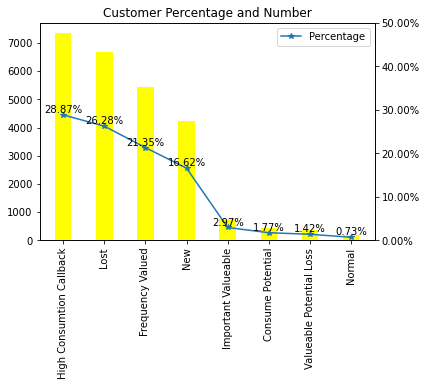

In [134]:
x=count['客户类型']
y=count['人数']
z=count['人数占比']

fmt='%.2f%%'
yticks = mtick.FormatStrFormatter(fmt)

fig=plt.figure()
ax1=fig.add_subplot(111)
ax1.bar(x,y,0.4,color="yellow")
plt.xticks(rotation=90)

ax2=ax1.twinx()
ax2.plot(x,z*100,marker='*',label='Percentage')
ax2.yaxis.set_major_formatter(yticks)
ax2.set_ylim([0, 50])
plt.legend(loc="middle")

for x,y in zip(x,z):
    plt.text(x,y*100,str(format(y,'.2%')),ha='center',va='bottom',rotation=0)

plt.title("Customer Percentage and Number")
plt.show()